### IMPORTANT: This notebook file will not run unless the .ipynb file and the supeheroData.csv are in the same folder! 

# Marvel-DC Comics data plot project skeleton

### DC_comics_skeleton created by Ricarose Roque. Pandas matplotlib skeleton created by Wendy Norris and plots created by Stephen Barton. This document was updated by Shiva Darian as a demo for Summer INFO 1201.

##### Step 1: Import the pandas and matplotlib libraries into Jupyter Notebook. <font color=red><-- Check out the new library</font>

This command provides routine instructions to Python on how to handle the data in the spreadsheet. We abbreviate Pandas as pd and Numpy as np for faster typing/cleaner looking code. 

To plot the data, we'll use a new library called matplotlib and a sublibrary called pyplot. (because matplotlib is huge) We abbreviate this as plt for clean typing

With matplotlib, it needs two particular directions. 
    1. matplotlib inline to display the plots inside the Jupyter Notebook cell.  
    2. plt.rcParams["figure.figsize"] = (x, y) to set the size for all the plots.

Click <i>Shift-Enter</i> through the import line. It won't look to you like anything happened but Jupyter knows. 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#this will display your graphs in line. 
%matplotlib inline

#you're specifying how large to show the figures
plt.rcParams["figure.figsize"] = (8, 6)

##### Step 2: Now we set up pandas to open the csv file. 

First, we'll tell Jupyter to use some of the built-in instructions from the imported Python libraries to read the file. 

We'll assign a new name to the csv file to make it easier to differentiate between the file on our desktops and the one we're working with in Jupyter.  

Next, use the pd.read_csv command to tell Jupyter to take all the data, read it, and copy it into this new variable called "superheroes". Finally, on the same line, we add the command to <i>parse_dates</i>. This is a nifty trick by Pandas to standardize the way the YEAR column in the csv file is formatted in Jupyter so that Python understands that 2017 is a year and not just a <i>string</i> or <i>integer</i>. This will make it easier for us to access and explore the data. 

Again, when you <i>Shift-Enter</i> through this next cell, it won't look like anything happened. 

In [15]:
#if you get an error here, stop and look at what your file name is and make sure you have exactly that written in your file here
superheroes = pd.read_csv("superhero_viz_data.csv", parse_dates = ["FIRST_YEAR"])

##### Step 3: Let's print a few lines of the superheroes list to make sure Jupyter read it correctly.

Pandas makes it super easy to print a nice dataframe to look at the <i>head</i> or the first 5 rows of the spreadsheet to check for any import errors. 

In [16]:
superheroes.head()

,UNIVERSE,page_id,name,urlslug,ID,ALIGN,IS_AVENGER,AVENGER_STATUS,AVENGER_YEAR,EYES,HAIR,SEX,SEXUALITY,ALIVE,APPEARANCES,FIRST_MONTH,FIRST_YEAR,DECEASED,RESURRECTED
0,DC,1702,Richard Occult (New Earth),Richard_Occult_(New_Earth),Secret Identity,ND,NO,ND,ND,Grey Eyes,Black Hair,Male Characters,Heterosexual Characters,Living Characters,125,October,1935,ND,ND
1,DC,158200,Arthur Pendragon (New Earth),Arthur_Pendragon_(New_Earth),Public Identity,Good Characters,NO,ND,ND,Brown Eyes,Brown Hair,Male Characters,Heterosexual Characters,Living Characters,41,February,1936,ND,ND
2,DC,289378,Bedivere (New Earth),Bedivere_(New_Earth),ND,ND,NO,ND,ND,ND,ND,Male Characters,Heterosexual Characters,Living Characters,ND,February,1936,ND,ND
3,DC,11333,Franklin Delano Roosevelt (New Earth),Franklin_Delano_Roosevelt_(New_Earth),Public Identity,Good Characters,NO,ND,ND,ND,Grey Hair,Male Characters,Heterosexual Characters,Living Characters,52,March,1936,ND,ND
4,DC,342641,Gareth (New Earth),Gareth_(New_Earth),ND,ND,NO,ND,ND,ND,ND,Male Characters,Heterosexual Characters,Living Characters,1,February,1936,ND,ND


#### Step 4: Now, we can get down to business and begin to explore the data with regular old Python code. Pandas, NumPy and Matplotlib are doing all the work behind the scenes. 

Unlike some of the code we've reviewed in class, this data analysis is much more streamlined by using the Python libraries to do the heavy lifting. We don't need to use the <i>"def main()"</i> and <i>"def"</i> functions to define the new variables.  

#### Step 5: Following are some examples of Python code calling different data insights from the spreadsheet on your desktop and plotting data visualizations. 

## Plot #1: Total number of characters by gender. 
### This is a fairly simple, straightforward query that would be well represented by a bar chart, horizontal bar chart or pie chart. Nothing fancy. Mostly gets the job done but there's a couple of problems.

Male Characters           16420
Female Characters          5803
ND                          978
Male Character              101
Female Character             50
Agender Characters           45
Genderless Characters        20
Genderfluid Characters        2
Transgender Characters        1
Name: SEX, dtype: int64


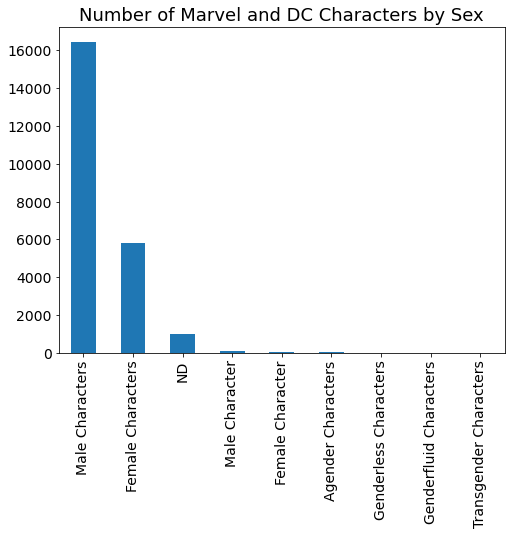

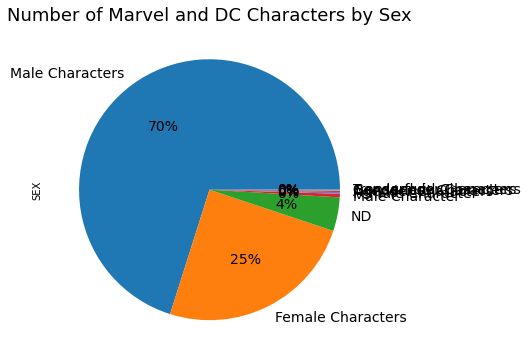

In [17]:
#Count all unique values in the 'sex' column in order to get the breakdown of genders
gen_counts = superheroes["SEX"].value_counts()
print(gen_counts)

#here it is as a bar chart. 
#Look carefully to detect the coding differences between sex_counts.plot lines of code for pie vs bar chart.
gen_counts.plot(kind="bar", fontsize=14)
plt.title("Number of Marvel and DC Characters by Sex", fontsize = 18)

plt.show()

#here it is as a pie chart 
#autopct = automatically percent (each piece of the pie will have a minimum representation)
gen_counts.plot(kind="pie", autopct="%1.0f%%", fontsize=14)
plt.title("Number of Marvel and DC Characters by Sex", fontsize = 18)

#plt.show displays the plot and is the equivalent of a print() statement
plt.show()



### Here, I'm customizing the look of my pie chart a bit. Adding custom colors, deleting the unnecessary "SEX" label on the left side of the chart, and forcing the pie to be a little more round. But there's still a problem with the tiny pie slice labels overlapping on the right side. 

<ipython-input-18-585f3e33e342>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


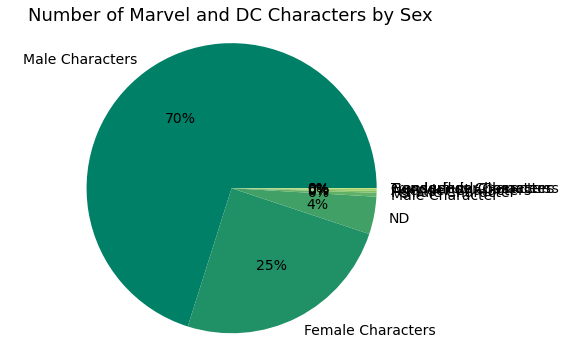

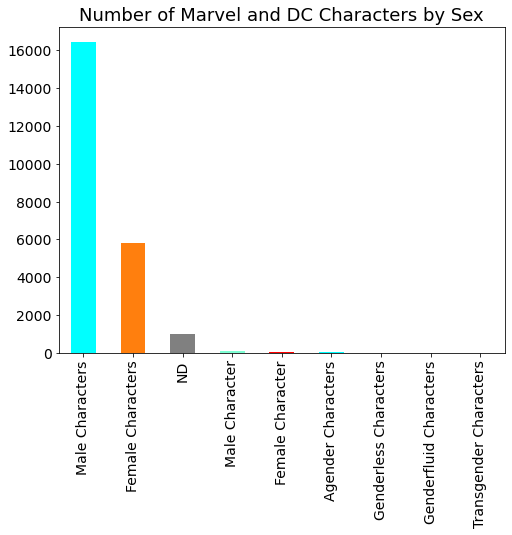

In [18]:
# get a tally for each of the unique values in the 'sex' column to get the gender breakdown
sex_counts = superheroes["SEX"].value_counts()

#PIE CHART
# colormaps that are pre-made - http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
sex_counts.plot(kind = "pie", colormap = "summer", autopct = "%1.0f%%", subplots = True, fontsize = 14)
plt.title("Number of Marvel and DC Characters by Sex", fontsize = 18)

#get rid of y axis label SEX - http://stackoverflow.com/questions/34094596/python-matplotlib-pyplot-pie-charts-how-to-remove-the-label-on-the-left-side
plt.axes().set_ylabel('')

#make plot have even axes so the pie chart is perfectly circular
plt.axis("equal")

plt.show()

#These modifications also help make the bar chart look nicer and more readable
plt.axes().set_ylabel('')

# ______________________________________________________
#BAR CHART
# add some custom colors from this pre-defined lists: 

# individual colors that you define as a list - https://matplotlib.org/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
my_colors = ["cyan", "#ff7f0e", "gray", "aquamarine", "red"]

sex_counts = superheroes["SEX"].value_counts()
sex_counts.plot(kind = "bar", color = my_colors, fontsize = 14)
plt.title("Number of Marvel and DC Characters by Sex", fontsize = 18)

plt.show()

## Fixing Messy Data (Replacing  & Dropping variables)
####  "Male Characters" & "Male Character" both refer to the same things, let's clean this up with the code below

### To fix the slice issue, I actually need to go back into my data. I can do one of three things: 
> • use .replace to replace the smaller values with an "other" category that combines the Agender, Genderless,Transgender, etc., categories together. (the example below applies .replace to the duplicate 'male' character values. Note that you will have all of the data and are editing it. <br>

> • use the .drop method to exclude those SEX categories from the analysis (but I'll have to account for that in the narrative). Note that you are eliminating data with this <br>

> • create a separate variable to hold the smaller gender categories together. Note that this will start from nothing and only pick up the rows you care about <br> 

##### *Below you will see one example of each, but there is still much more cleaning for you to do! *


In [19]:
#Replacing variables
#make sure to put all the data in a new variable in order to manipulate
combined_superheroes = superheroes

#after loading all of the data into the new variable, let's start editing it. 
#first, let's replace "Male Characters" whenever that comes up with "MALE"
combined_superheroes = combined_superheroes.replace("Male Characters", "MALE")
#next, in the same variable, replace "Male Character" with MALE
combined_superheroes = combined_superheroes.replace("Male Character", "MALE")

# update our tally of unique genders
sex_counts = combined_superheroes["SEX"].value_counts()
print(sex_counts)

MALE                      16521
Female Characters          5803
ND                          978
Female Character             50
Agender Characters           45
Genderless Characters        20
Genderfluid Characters        2
Transgender Characters        1
Name: SEX, dtype: int64


<ipython-input-20-2d0adaa0e1b6>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


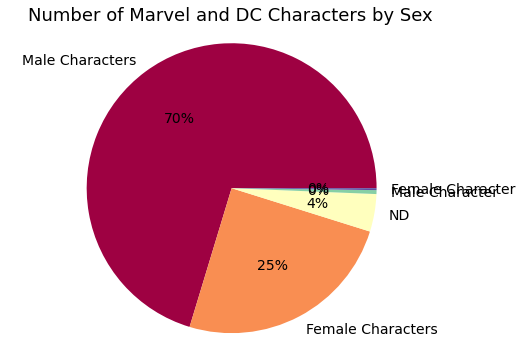

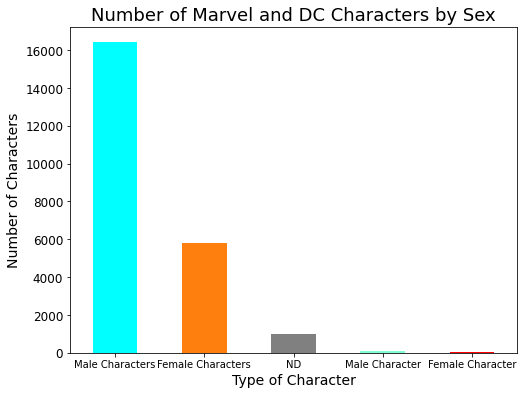

In [20]:
#Dropping Values
#drop all of the other SEX categories other than Male, Female and ND
#these variables store teh rest of the file without the dropped values
genderA = superheroes.drop(superheroes[superheroes.SEX == "Agender Characters"].index)
genderGL = genderA.drop(genderA[genderA.SEX == "Genderless Characters"].index)
genderGF = genderGL.drop(genderGL[genderGL.SEX == "Genderfluid Characters"].index)
genderT = genderGF.drop(genderGF[genderGF.SEX == "Transgender Characters"].index)
genderMF = genderT
# you would still need to keep going


#PIE CHART of DROPPED Values
drop_gender = genderMF["SEX"].value_counts()
drop_gender.plot(kind = "pie", colormap = "Spectral", autopct = "%1.0f%%", subplots = True, fontsize = 14)
plt.title("Number of Marvel and DC Characters by Sex", fontsize = 18)

#get rid of y axis label SEX - http://stackoverflow.com/questions/34094596/python-matplotlib-pyplot-pie-charts-how-to-remove-the-label-on-the-left-side
plt.axes().set_ylabel('')

#make plot have even axes so the pie chart is perfectly circular
plt.axis("equal")

plt.show()
#________________________________________________

#BAR CHART of DROPPED Values
#Dropping the other SEX categories also helps make the bar chart look better too
drop_gender = genderMF["SEX"].value_counts()

# add some custom colors from this pre-defined list: 
# https://matplotlib.org/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
my_colors = ["cyan", "#ff7f0e", "gray", "aquamarine", "red"]

drop_gender.plot(kind = "bar", color = my_colors, fontsize = 14)
plt.title("Number of Marvel and DC Characters by Sex", fontsize = 18)
plt.xticks(rotation = 0, fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Type of Character", fontsize = 14)
plt.ylabel("Number of Characters", fontsize = 14)


plt.show()

#### Please note ^^ I have been changing my variable names (sex_counts, gen_counts, dropped_gender, etc.) so as not to overwrite the data so you can see unique examples. You will probably want use a unique variable for each plot you are trying to make (or maybe even just 1 variable for your entire project to continually updated). It depends on your situation.

## Plot #2: This is another basic graph based on the Marvel-DC skeleton that visualizes characteristics across time

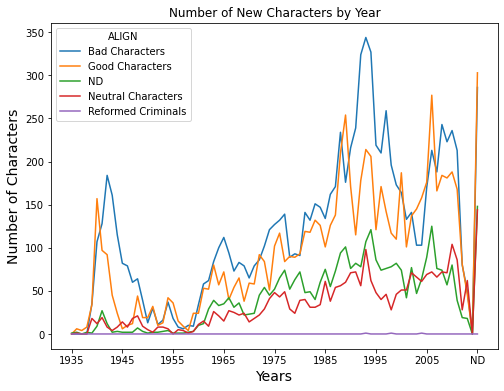

In [21]:
#Question: what is the distribution of character introduction by alignment?
#crosstab of the first year characters appeared with their alignment
appearance_by_align = pd.crosstab(superheroes['FIRST_YEAR'], superheroes['ALIGN'])

#note the syntactical differences in this plot vs the other ones so far
appearance_by_align.plot()
plt.title("Number of New Characters by Year")
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Number of Characters", fontsize = 14)
plt.show()

## Plot #3: A crosstab of living/dead characters & alignment
### This kind of query is best suited as a bar chart — vertical or horizontal.

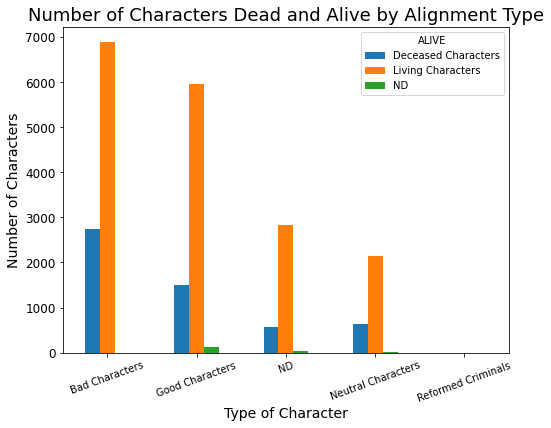

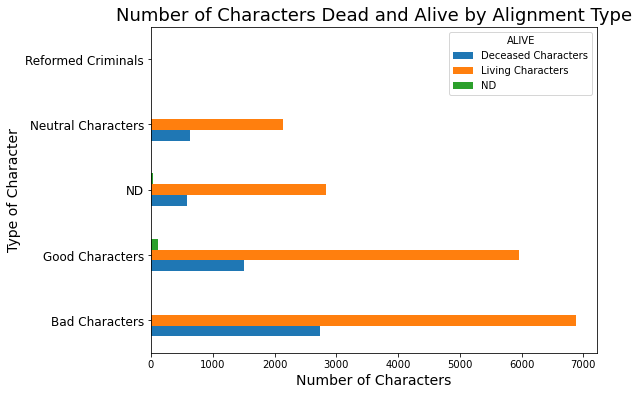

In [23]:
# TYPICAL BAR CHART
#Question: How many good/bad/neutral superheroes are alive?
#start with a crosstab of alignment & the align column
alive_or_dead = pd.crosstab(superheroes["ALIGN"], superheroes["ALIVE"])
#tell python to plot a bar graph
alive_or_dead.plot(kind = 'bar')
# look to the function we're calling from pyplot (plt) to get a handle of what we're formatting
# functions from libraries appear in the following format libraryname.functionname(parameters)
plt.title("Number of Characters Dead and Alive by Alignment Type", fontsize = 18)
plt.xticks(rotation = 20, fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Type of Character", fontsize = 14)
plt.ylabel("Number of Characters", fontsize = 14)
plt.show()


# HORIZONTAL bar chart. 
# Notice that we need to change the x- and ylabels. 
alive_or_dead = pd.crosstab(superheroes["ALIGN"], superheroes["ALIVE"])
alive_or_dead.plot(kind = 'barh')
plt.title("Number of Characters Dead and Alive by Alignment Type", fontsize = 18)
plt.xticks(rotation = 0, fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Number of Characters", fontsize = 14)
plt.ylabel("Type of Character", fontsize = 14)

plt.show()

## Plot #4: Another crosstab with more control over the plot layout
### But check out the last bar representing Reformed Criminals' identities. What's going on there? Is it a data error?

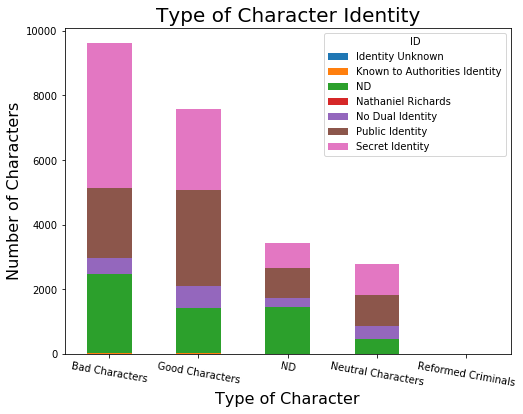

In [9]:
#Question: what is the breakdown of character alignment & ID?
#crosstab between the columns you want to see
identity_count = pd.crosstab(superheroes['ALIGN'], superheroes['ID'])

#plot a stacked bar chart
identity_count.plot(kind = 'bar', stacked = True)
plt.title("Type of Character Identity", fontsize = 20)
plt.xticks(rotation=-10, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Type of Character", fontsize = 16)
plt.ylabel("Number of Characters", fontsize = 16)
plt.show()

### It's not a data error but just a value with a very low number in comparison to the others. Consider removing it from the data query and using your narrative to mention that there are only a few characters with unknown identities. 

### Another option is to use a different chart type (like this area chart) that helps to illustrate how few reformed criminals there are.

Text(0, 0.5, 'Number of Characters')

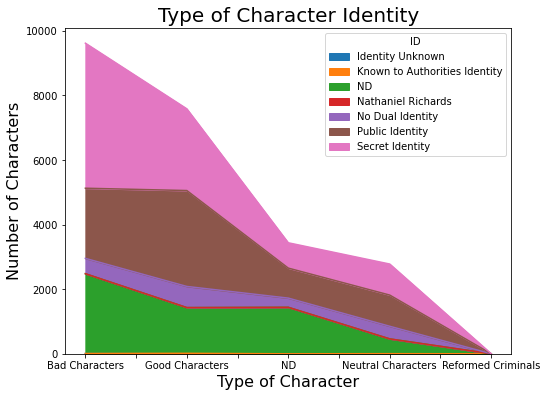

In [24]:
identity_count = pd.crosstab(superheroes['ALIGN'], superheroes['ID'])
identity_count.plot.area();
plt.title("Type of Character Identity", fontsize = 20)
plt.xticks(rotation=0, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Type of Character", fontsize = 16)
plt.ylabel("Number of Characters", fontsize = 16)

## Plot #5: Another view of the chart above as a regular bar chart. 
### But we still seem to have a problem with the last character type. And the plot layout could use a little help. What would you do? 

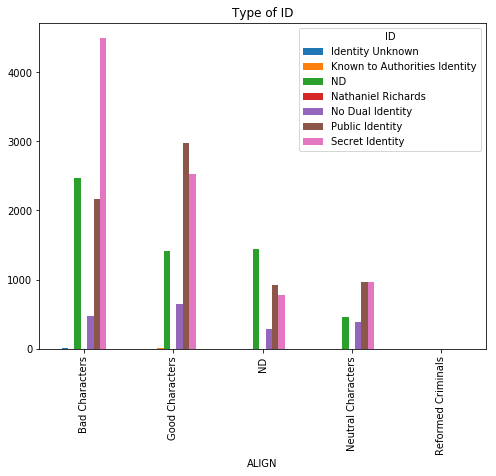

In [11]:
identity_count = pd.crosstab(superheroes['ALIGN'], superheroes['ID'])
identity_count.plot(kind= 'bar')
plt.title('Type of ID')
plt.show()

## Plot #6: A plot that's fighting itself to the death
### Chalk this up to a great idea that's not actually plottable. How do you plot unique hero names that can't be grouped together, like character types (Good, Bad, Neutral, etc.)? Hint: Not very well. 

In [26]:
#in a new variable (superhero_names), load in everything from superheroes, but drop the "ND" appearances
superhero_names = superheroes.drop(superheroes[superheroes.APPEARANCES == "ND"].index)
#place them in a new variable that sorts the previous variable (superhero_names) in order from most appearances to least
pop_heroes = superhero_names.sort_values(by = "APPEARANCES", ascending = False)

print(pop_heroes)

      UNIVERSE page_id                               name  \
3132    MARVEL      ND  Grand Vizier (Asgard) (Earth-616)   
5089    MARVEL      ND            Pyreus Kril (Earth-616)   
8046    MARVEL      ND           Yuriko Oyama (Earth-616)   
18371   MARVEL      ND         Elijah Bradley (Earth-616)   
1481    MARVEL      ND           Louise Grant (Earth-616)   
...        ...     ...                                ...   
17111   MARVEL      ND          Bert (Origin) (Earth-616)   
6521    MARVEL      ND             Cybortrons (Earth-616)   
6524    MARVEL      ND        Daniel Ironwood (Earth-616)   
17107   MARVEL      ND             Aunt Hazel (Earth-616)   
5489    MARVEL      ND                 Zotarr (Earth-616)   

                                 urlslug                ID  \
3132   Grand_Vizier_(Asgard)_(Earth-616)   Secret Identity   
5089             Pyreus_Kril_(Earth-616)   Secret Identity   
8046            Yuriko_Oyama_(Earth-616)   Secret Identity   
18371         Elija

### The "TypeError: Empty 'DataFrame': no numeric data to plot" that displays below occurs because you can't plot all 23,420 names. 

In [27]:
#same two lines of code as above
superhero_names = superheroes.drop(superheroes[superheroes.APPEARANCES == "ND"].index)
pop_heroes = superhero_names.sort_values(by = "APPEARANCES", ascending = False)

#there are too many unique characters, so the following plot will break
ax = pop_heroes.iloc[:10].plot(kind = "barh")
ax = pop_heroes.plot(kind = "barh")
ax.invert_yaxis()
plt.title("Characters Who Have Appeared the Most")
plt.show()

TypeError: no numeric data to plot

## Plot #7: Superheroes by era
### Let's try a fancier look at date ranges. First, I want to narrow my data down to only characters who appeared in the 1960s vs 1970s.

## NOTE: *this is an example where loading data into unique variables is critical so that you aren't overriding the main 'superheroes' data* stay organized!

Superheroes during the 1960s: 
1965    234
1963    229
1964    211
1968    206
1966    203
1967    183
1969    163
1962    152
1961    138
1960     79
Name: FIRST_YEAR, dtype: int64
1798

Superheroes during the 1970s: 
1976    357
1977    346
1975    329
1979    269
1973    269
1978    260
1974    258
1972    245
1971    179
1970    161
Name: FIRST_YEAR, dtype: int64
2673


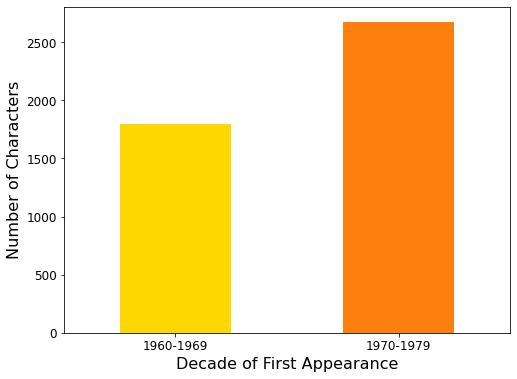

In [34]:
# I want to include only superheroes whose first appearance year is between 1960 - 1969

#new variable that isolates all of the rows in the 1960s from the superheroes data
#this variable below (superheroes_hippie_era), however, only figures out what rows matter 
#this means that it stores the index (row numbers) associated with data that fits our query below
superheroes_hippie_era = (superheroes["FIRST_YEAR"] >= "1960") & (superheroes["FIRST_YEAR"] <= "1969")

# we take that list of indexes, and extract the entire corresponding row and store it in a new variable
superheroes_hippies = (superheroes[superheroes_hippie_era])

#find the tally of unique year values (to understand how many characters appeared in a given year)
sixties_year_counts = superheroes_hippies["FIRST_YEAR"].value_counts()
#find a tally of unique sex values (for a tally of gender)
sixties_sex_total = superheroes_hippies["SEX"].count()

print("Superheroes during the 1960s: ")
print(sixties_year_counts)
print(sixties_sex_total)

# This is an empty print statement to add a line
print()


# Next, I take the new dataframe called genderMFND and further modify it. 
# I want to include only superheroes whose first appearance year is between 1970 - 1979
# repeating everything for '70s
superheroes_motown_era = (superheroes["FIRST_YEAR"] >= "1970") & (superheroes["FIRST_YEAR"] <= "1979")
superheroes_motowns = (superheroes[superheroes_motown_era])
#seventies_sex_counts_sort = superheroes_motowns.sort_values(by = "FIRST_YEAR", ascending = True, inplace = True)

seventies_sex_counts = superheroes_motowns["FIRST_YEAR"].value_counts()
seventies_sex_total = superheroes_motowns["SEX"].count()

print("Superheroes during the 1970s: ")
print(seventies_sex_counts)
print(seventies_sex_total)

# In this step, I need to knit together the two dataframes I created with the pd.Series method
# The index defines the decades for the x-axis of the chart

best_era = pd.Series([sixties_sex_total, seventies_sex_total], index = ["1960-1969", "1970-1979"])

# add some custom colors (they will only work in order of appearance)
my_colors = ["gold", "#ff7f0e", "gray", "aquamarine", "red"]

# set the bar chart customizations
best_era.plot(kind = "bar", stacked = True, color = my_colors)

plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Decade of First Appearance", fontsize = 16)
plt.ylabel("Number of Characters", fontsize = 16)

plt.show()


## Plot #8: Superheroes by era and sex
### Now, I want to display the characters by decade according to their SEX. Y-axis is not correct. 

Male and Female Superheroes All Years
Male Characters      16521
Female Characters     5853
ND                     978
Name: SEX, dtype: int64

Superheroes during the 1960s: 
1791
Male Characters      1418
Female Characters     248
ND                    125
Name: SEX, dtype: int64

Superheroes during the 1970s: 
2667
Male Characters      1999
Female Characters     527
ND                    141
Name: SEX, dtype: int64


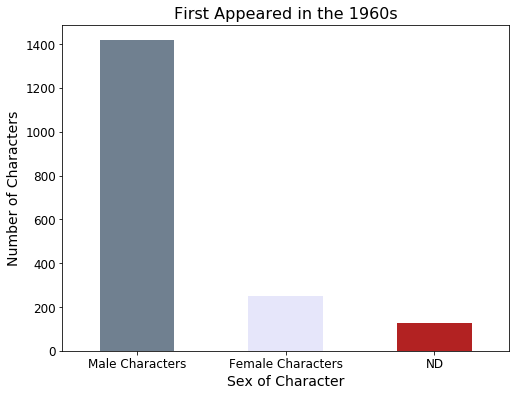

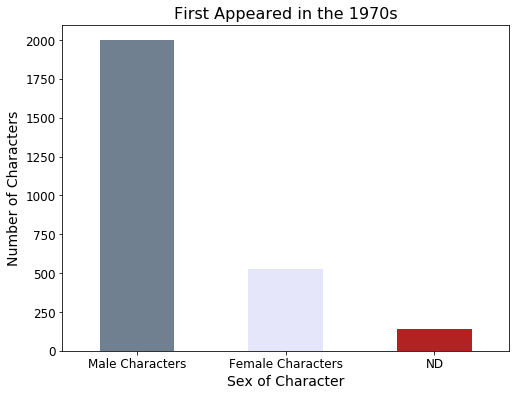

In [15]:
# Here I'm dropping the SEX types with low numbers in order to narrow down the dataframe to only Male, Female and ND. 
# I need to do this step multiple times in order to filter out each SEX type
genderA = superheroes.drop(superheroes[superheroes.SEX == "Agender Characters"].index)
# NOTE: each time, we create a new variable, and build on top of it by using the previous line's variable to continue dropping.
genderGL = genderA.drop(genderA[genderA.SEX == "Genderless Characters"].index)
genderGF = genderGL.drop(genderGL[genderGL.SEX == "Genderfluid Characters"].index)
genderT = genderGF.drop(genderGF[genderGF.SEX == "Transgender Characters"].index)

# The new dataframe is renamed genderMFND (Male, Female, ND) so it's more descriptive of the data. 
# It is the remainder from all the drops ending with genderT 
# you would need to combine this tactic with the .replace for the other duplicate values
genderMFND = genderT

sex_counts = genderMFND["SEX"].value_counts()
print("Male and Female Superheroes All Years")
print(sex_counts)

# Next, I take the new dataframe called genderMFND and further modify it. 
# I want to include only superheroes whose first appearance year is between 1960 - 1969
superheroes_hippie_era = (genderMFND["FIRST_YEAR"] >= "1960") & (genderMFND["FIRST_YEAR"] <= "1969")
# take the indexes identified by (superheroes_hippie_era) and get the entire row of information, store that in superheroes_hippies
superheroes_hippies = (genderMFND[superheroes_hippie_era])

sixties_sex_total = superheroes_hippies["SEX"].count()
sixties_sex_counts = superheroes_hippies["SEX"].value_counts()


print("\nSuperheroes during the 1960s: ")
print(sixties_sex_total)
print(sixties_sex_counts)

# Next, I take the dataframe called genderMFND and modify it again. 
# I want to include only superheroes whose first appearance year is between 1970 - 1979

superheroes_motown_era = (genderMFND["FIRST_YEAR"] >= "1970") & (genderMFND["FIRST_YEAR"] <= "1979")
superheroes_motowns = (genderMFND[superheroes_motown_era])
#seventies_sex_counts_sort = superheroes_motowns.sort_values(by = "FIRST_YEAR", ascending = True, inplace = True)

seventies_sex_total = superheroes_motowns["SEX"].count()
seventies_sex_counts = superheroes_motowns["SEX"].value_counts()

print("\nSuperheroes during the 1970s: ")
print(seventies_sex_total)
print(seventies_sex_counts)

# BAR GRAPH of 60's data
sixties_sex_counts.plot(kind = "bar", stacked = True, color = [my_colors], subplots = True)
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("First Appeared in the 1960s", fontsize = 16)
plt.xlabel("Sex of Character", fontsize = 14)
plt.ylabel("Number of Characters", fontsize = 14)

plt.show()

# BAR GRAPH of 70's data
seventies_sex_counts.plot(kind = "bar", stacked = True, color = [my_colors], subplots = True)
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("First Appeared in the 1970s", fontsize = 16)
plt.xlabel("Sex of Character", fontsize = 14)
plt.ylabel("Number of Characters", fontsize = 14)

plt.show()